# Trabajo Práctico 4 - Procesamiento de Imágenes
- Francisco Devaux
- Agustín Yornet

## Ejercicio 1
> Transformada de Fourier (FT) en 2D: Realiza la transformada de Fourier de una imagen en escala de grises utilizando la función fft2 de NumPy. Muestra la imagen original y su transformada de Fourier (usando imshow de Matplotlib).

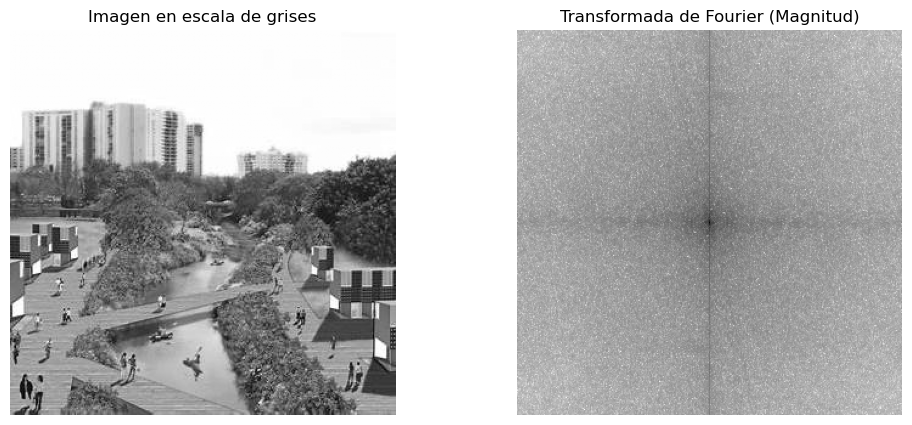

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('imagenes/paisaje1.jpg')
if img.ndim == 3:
    img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_gray = img

f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray_r')
plt.title('Transformada de Fourier (Magnitud)')
plt.axis('off')

plt.show()

## Ejercicio 11

> Transformada de Fourier inversa: Realiza la transformada de Fourier inversa para recuperar la imagen original a partir de su versión filtrada en el dominio frecuencial. Compara la imagen original con la imagen recuperada.

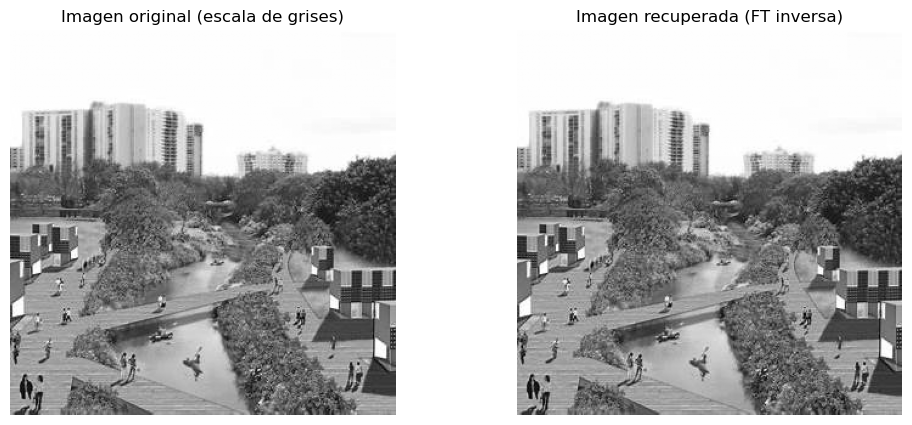

In [3]:
img_recuperada = np.fft.ifft2(f)
img_recuperada = np.real(img_recuperada)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen original (escala de grises)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_recuperada, cmap='gray')
plt.title('Imagen recuperada (FT inversa)')
plt.axis('off')

plt.show()

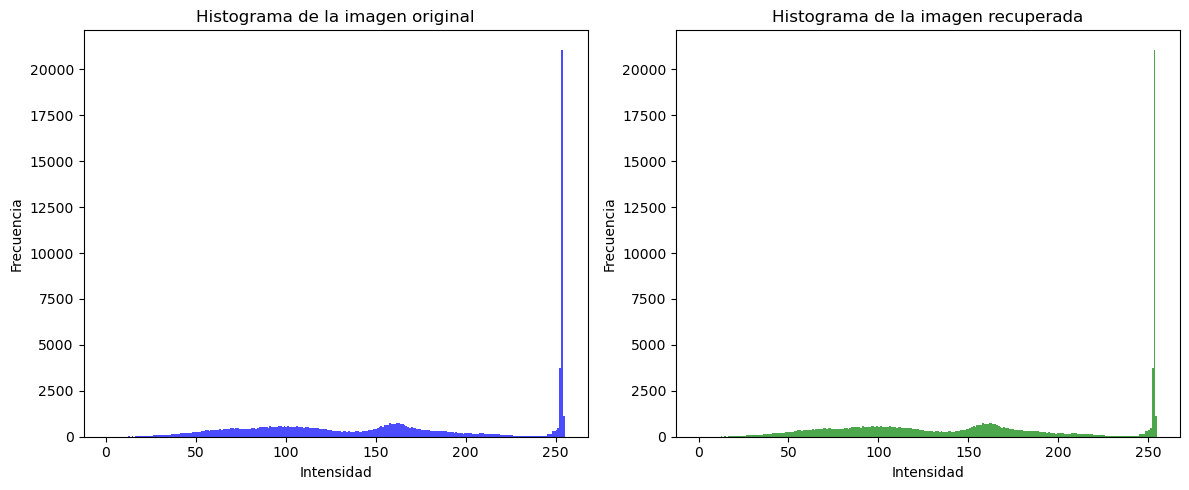

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histograma de la imagen original')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(img_recuperada.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histograma de la imagen recuperada')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Inciso a)

> ¿Cómo se visualiza la diferencia entre las frecuencias altas y bajas en una imagen? Ejercicio sugerido: Aplicar la Transformada de Fourier (DFT) y mostrar la magnitud del espectro centrado con fftshift.

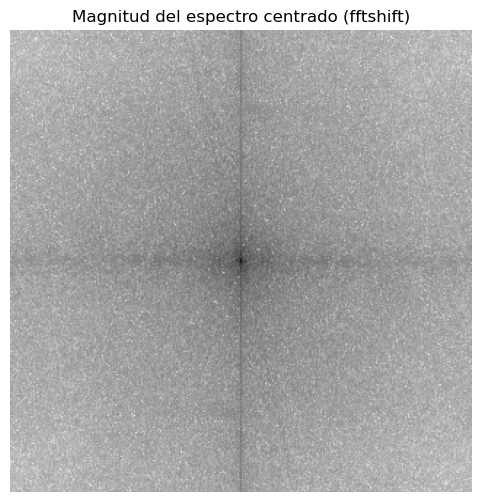

In [5]:
# Aplicar la Transformada de Fourier y mostrar la magnitud del espectro centrado con fftshift
fshift = np.fft.fftshift(np.fft.fft2(img_gray))
magnitude_spectrum = np.log(np.abs(fshift) + 1)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray_r')
plt.title('Magnitud del espectro centrado (fftshift)')
plt.axis('off')
plt.show()

La parte central del espectro generalmente permite visualizar las frecuencias bajas, que varían lentamente y que representan cambios graduales, mientras que las frecuentcias altas se distribuyen alrededor del centro, y representan cambios más bruscos que varían con mayor rapidez.

### Inciso b)

>  ¿Qué ocurre si eliminamos las componentes de alta frecuencia de una imagen? ¿Y si eliminamos las de baja frecuencia? Ejercicio sugerido: Aplicar filtros pasa bajos y pasa altos en el dominio de la frecuencia y reconstruir la imagen con la transformada inversa.

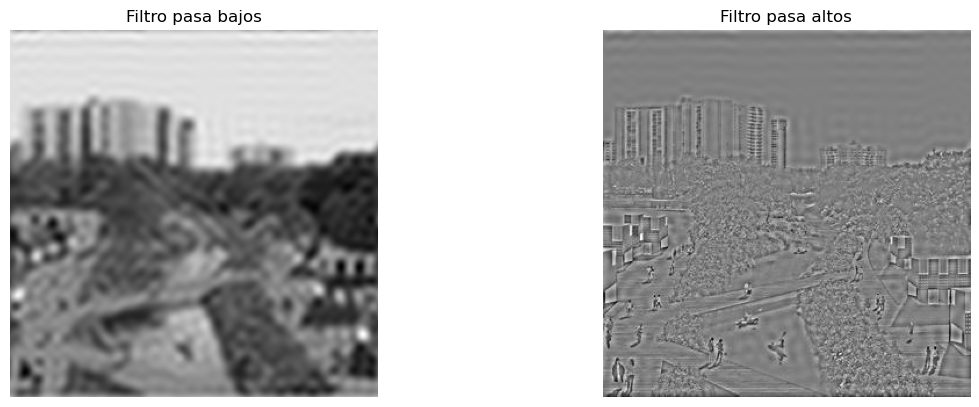

In [6]:
rows, cols = img_gray.shape
crow, ccol = rows // 2, cols // 2
radio = 25  # Valor ajustable para el radio del filtro

mask_lp = np.zeros((rows, cols), np.uint8)
mask_lp[crow-radio:crow+radio, ccol-radio:ccol+radio] = 1
fshift_lp = fshift * mask_lp
img_lp = np.fft.ifft2(np.fft.ifftshift(fshift_lp))
img_lp = np.real(img_lp)

mask_hp = np.ones((rows, cols), np.uint8)
mask_hp[crow-radio:crow+radio, ccol-radio:ccol+radio] = 0
fshift_hp = fshift * mask_hp
img_hp = np.fft.ifft2(np.fft.ifftshift(fshift_hp))
img_hp = np.real(img_hp)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_lp, cmap='gray')
plt.title('Filtro pasa bajos')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_hp, cmap='gray')
plt.title('Filtro pasa altos')
plt.axis('off')

plt.tight_layout()
plt.show()

El flitro pasa bajos preserva las frecuencias bajas, atenuando las altas, y da como resultado un suavizado de la imagen. Por otro lado, el filtro pasa altos preserva las frecuencias altas, atenuando las bajas, y da como resultado un agudizamiento de la imagen, remarcando sobre todo los bordes al dejar los cambios bruscos que se producen.

### Inciso c)

> ¿Qué representa la fase de la transformada de Fourier de una imagen? ¿Qué ocurre si se conserva solo la fase o solo la magnitud? Ejercicio sugerido: Reconstruir una imagen usando solo la magnitud y fase de otra imagen, intercambiar fase y magnitud entre dos imágenes distintas.

#### Prueba 1: Reconstruir sólo con la Magnitud

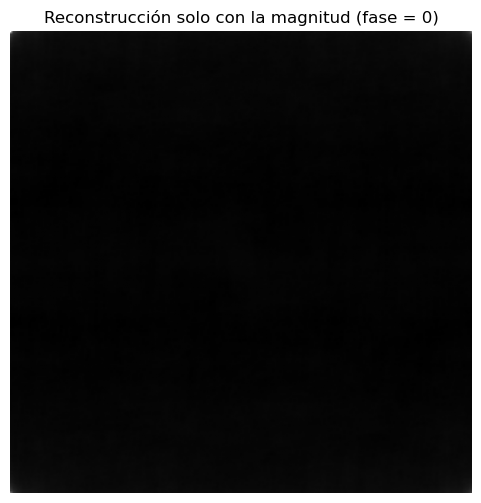

In [7]:
mag = np.abs(f)
fase_cero = np.zeros_like(f)
f_solo_magnitud = mag * np.exp(1j * fase_cero)
img_solo_magnitud = np.fft.ifft2(f_solo_magnitud)
img_solo_magnitud = np.real(img_solo_magnitud)

plt.figure(figsize=(6, 6))
plt.imshow(img_solo_magnitud, cmap='gray')
plt.title('Reconstrucción solo con la magnitud (fase = 0)')
plt.axis('off')
plt.show()

#### Prueba 2: Reconstruír sólo con la Fase

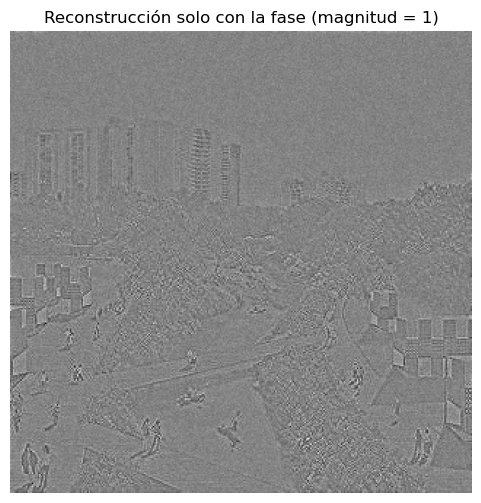

In [8]:
# Reconstrucción usando solo la fase (magnitud = 1)
fase = np.angle(f)
mag_uno = np.ones_like(f)
f_solo_fase = mag_uno * np.exp(1j * fase)
img_solo_fase = np.fft.ifft2(f_solo_fase)
img_solo_fase = np.real(img_solo_fase)

plt.figure(figsize=(6, 6))
plt.imshow(img_solo_fase, cmap='gray')
plt.title('Reconstrucción solo con la fase (magnitud = 1)')
plt.axis('off')
plt.show()

#### Prueba 3: Intercambiar fase y magnitud entre dos imágenes

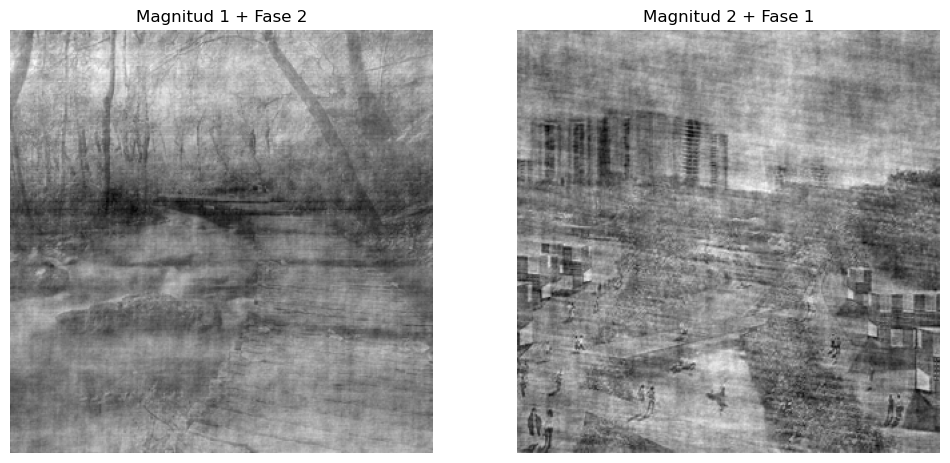

In [9]:
from skimage.transform import resize

# Cargar la segunda imagen y convertirla a escala de grises
img2 = imread('imagenes/paisaje2.jpg')
if img2.ndim == 3:
    img2_gray = np.dot(img2[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img2_gray = img2

# Redimensionar img2_gray si es necesario para que coincida con img_gray
if img2_gray.shape != img_gray.shape:
    img2_gray = resize(img2_gray, img_gray.shape, preserve_range=True)

# Transformada de Fourier de la segunda imagen
f2 = np.fft.fft2(img2_gray)
mag2 = np.abs(f2)
fase2 = np.angle(f2)

# Intercambiar magnitud y fase
f_mag1_fase2 = mag * np.exp(1j * fase2)
f_mag2_fase1 = mag2 * np.exp(1j * fase)

img_mag1_fase2 = np.real(np.fft.ifft2(f_mag1_fase2))
img_mag2_fase1 = np.real(np.fft.ifft2(f_mag2_fase1))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_mag1_fase2, cmap='gray')
plt.title('Magnitud 1 + Fase 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mag2_fase1, cmap='gray')
plt.title('Magnitud 2 + Fase 1')
plt.axis('off')
plt.show()